# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: 
This is a classification problem since there are two possible discrete outcomes, which is a typical classification problem:  1.  students who might need early intervention before they fail to graduate and 2. students who do not need early prevention. They can be classified into two groups with a binary outcome: 1. yes = 1 for students who need early intervention and 2. no = 0 for students who do not need early intervention. **

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [2]:
student_data.shape

(395, 31)

In [3]:
student_data.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
passed        395
dtype: int64

In [4]:
type(student_data)

pandas.core.frame.DataFrame

In [5]:
student_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [6]:
student_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [7]:
# TODO: Calculate number of students (or calculate number of rows)
n_students = student_data.shape[0]

# TODO: Calculate number of features (number of columns - index column)
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = student_data[student_data.passed == 'yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data.passed == 'no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = 100 * (n_passed / float(n_students))

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [8]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

In [9]:
# Extract target column 'passed'
target_col = student_data.columns[-1] 

In [10]:
# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [11]:
# Another way of showing the list of feature columns 
[column for column in feature_cols]

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [12]:
print "\nTarget column: {}".format(target_col)


Target column: passed


In [13]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

In [14]:
# Show the feature information by printing the first five rows
student_data[feature_cols].head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [15]:
print "\nFeature values:-"
print X_all.head(5)  # print the first 5 rows


Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       yes      yes        no       5         3     3    1    1      3   
2   ...       yes      yes        no       4         3     2    2    3      3   
3   ...       yes      yes       yes       3         2     2    1    1      5   
4   ...       yes       no        no       4         3     2    1    2      5   

  absences  
0        6  
1        4  

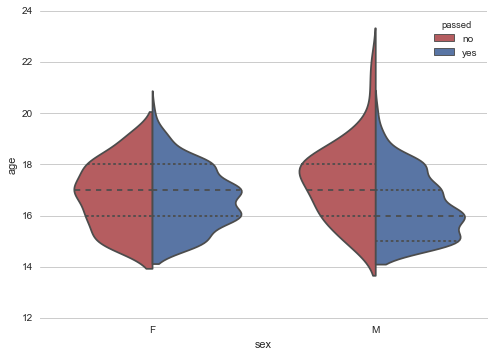

In [16]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="sex", y="age", hue="passed", data=student_data, split=True, 
               inner="quart", palette={"yes": "b", "no": "r"})
sns.despine(left=True)

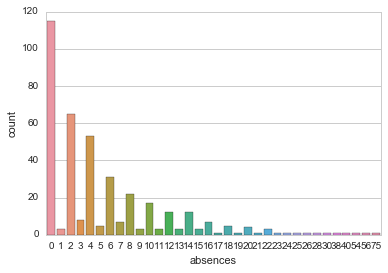

In [17]:
%matplotlib inline
import seaborn as sns
sns.countplot(student_data['absences']);

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [18]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))


Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [19]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation 

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, train_size=num_train, test_size=num_test, random_state=True)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


In [20]:
# To check stratification
print np.mean(y_train == 'no')
print np.mean(y_test == 'no')

0.34
0.294736842105


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** Answer:

##### 1.  SVM
- Real-world application:  SVM can be applied to the cancer diagnosis problem.
      
  Reference:  http://bioinformatics.oxfordjournals.org/content/16/10/906.short
  
- Strength of the model:  SVM is a stable and robust learning algorithm compared to other machine learning algorithm.  The kernel transformation of SVM algorithm finds non-linearity in the data and maximizes the margin between decision boundary and the closest sample data.  Additionally, SVM can be applied to relatively small number of dataset, even when the number of features is greater than the number of sample dataset. 
    
- Weakness of the model:  SVM can perform poorly in very large datasets. Choosing the best kernel can be difficult for non-linear cases, and requires tuning of parameters since the model doesn't provide a probability estimate for predictions directly.  We can calculate probabilities using *probability = True* but its computational cost is expensive as it has to compute *OneVsAll*.  Moreover, SVM output parameters are not interpretable.
    
- What makes this model a good candidate for the problem:  SVM can work fairly well when there is relatively higher number of features compared to the number of dataset.  Also it is  memory efficient as the model has to remember the support vectors. 
    
##### 2.  Logistic Regression
   
- Real-world application:  Logistic Regression can be applied to the business modeling and researching on credit scoring.
    
  Reference:  http://onlinelibrary.wiley.com/doi/10.1002/isaf.261/full
      
- Strength of the model:  Logistic Regression is a linear classifier that has relatively low computational requirements compared to other supervised learning models.  
    
- Weakness of the model:  However, this model will perform poorly with high number of features and/or missing data and cannot fit non-linear dataset. In addition, this model will try to maximize likelihood using all training data when outliers are introduced.  
    
- What makes this model a good candidate for the problem:  Logistic Regression works well based on the sigmoid function using linear data and does not typically overfit. These characteristics of the model are very useful when estimating probabilities and setting a threshold value.
    
##### 3.  K-Nearest Neighbors
   
- Real-world application:  KNN can be applied to the stock price forecasting.
    
  Referece:  http://www.ijbhtnet.com/journals/Vol_3_No_3_March_2013/4.pdf
    
- Strength of the model:  KNN is robust to very large dataset with lots of noise as long as an appropriate n_neighbor is used.  Training has no cost and understanding of the data is not required.
    
- Weakness of the model:  All features in KNN model have the same weight. And its lazy learning method classification time can be slow although training is fast.  
    
- What makes this model a good candidate for the problem:  KNN is simple and efficient technique that can be applied to the problem because failing students could exhibit similar set of behaviors through a small set of features.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [21]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [23]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import svm
from sklearn import linear_model
from sklearn import neighbors

# TODO: Initialize the three models
clf_A = svm.SVC(random_state=42)
clf_B = linear_model.LogisticRegression(random_state=42)
clf_C = neighbors.KNeighborsClassifier()

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train
y_train_300 = y_train

# loop thru models, then thru train sizes
for clf in [clf_A, clf_B, clf_C]:
    print "\n{}: \n".format(clf.__class__.__name__)
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0018 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8591.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8333.
Training a SVC using a training set size of 200. . .
Trained model in 0.0040 seconds
Made predictions in 0.0037 seconds.
F1 score for training set: 0.8581.
Made predictions in 0.0018 seconds.
F1 score for test set: 0.8408.
Training a SVC using a training set size of 300. . .
Trained model in 0.0088 seconds
Made predictions in 0.0077 seconds.
F1 score for training set: 0.8584.
Made predictions in 0.0015 seconds.
F1 score for test set: 0.8462.

LogisticRegression: 

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0009 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8529.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.7737.
Training a LogisticRegression using a training set size of 200

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Support Vector Classification**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0018             |         0.0012         |       0.8591      |    0.8333         |
| 200               |      0.0040             |         0.0037         |       0.8581      |    0.8408         |
| 300               |      0.0088             |         0.0077         |       0.8584      |    0.8462         |

** Classifer 2 - LogisticRegression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0009             |       0.0002           |   0.8529            |       0.7737      |
| 200               |      0.0023             |       0.0002           |   0.8269          |       0.7857      |
| 300               |      0.0024             |       0.0002           |   0.8337           |       0.7368      |

** Classifer 3 - KNeighborsClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0004            |        0.0010          |     0.7883      |     0.7727        |
| 200               |       0.0005            |        0.0025          |     0.8345        |     0.7971        |
| 300               |       0.0007            |        0.0062          |     0.8558         |     0.7681        |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

In [24]:
from sklearn.metrics import classification_report
for clf in [clf_A, clf_B, clf_C]:
    print '\nReport for {}:\n'.format(clf.__class__.__name__)
    print classification_report(y_test, clf.predict(X_test))
    print '-'*52


Report for SVC:

             precision    recall  f1-score   support

         no       0.83      0.18      0.29        28
        yes       0.74      0.99      0.85        67

avg / total       0.77      0.75      0.68        95

----------------------------------------------------

Report for LogisticRegression:

             precision    recall  f1-score   support

         no       0.38      0.39      0.39        28
        yes       0.74      0.73      0.74        67

avg / total       0.64      0.63      0.63        95

----------------------------------------------------

Report for KNeighborsClassifier:

             precision    recall  f1-score   support

         no       0.42      0.36      0.38        28
        yes       0.75      0.79      0.77        67

avg / total       0.65      0.66      0.66        95

----------------------------------------------------


In [25]:
from sklearn.metrics import f1_score
print "F1 score for predicting all \"yes\" on test set: {:.4f}".format(
    f1_score(y_test, ['yes']*len(y_test), pos_label='yes', average='binary'))

F1 score for predicting all "yes" on test set: 0.8272


### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer:  Three classification models have been applied to the given dataset:  SVM, Logistic Regression and KNN. Training time, prediction time and F1 scores have been analyzed on these three models, and Support Vector Classification appears to have the best accurate prediction result with the highest F1 scores (SVM worked fairely well with small computation resources).  In addition, the spreads between F1 scores on training and test set in SVM are the lowest.  In other words, SVC model has the least overfitting issue to the small training set compared to Logistic Regression model (Please see tabular results above).  However, Logistic Regression classifier model shows the fastest performance speed in terms of both training and prediction time for the training set size above 200.  This means that Logistic Regression can help saving CPU processing time for high volume computations.**

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: 

Based on existing dataset for the student's performance (students who fail to graduate and students who gradute), the SVM model learns the student's performance indicators and outputs a weight for each performance indicator.  SVM then predicts how likely a student is to gradute or fail to graduate by analyzing all 395 dateset that were run through the algorithm (students are classified into two groups whether they are likely to graduate or fail to graduate and need prevention program).  

For example, imagine that blue dots represent students who gradute and red dots represent students who fail to graduate and they are placed in 2 dimentional space as shown below:  

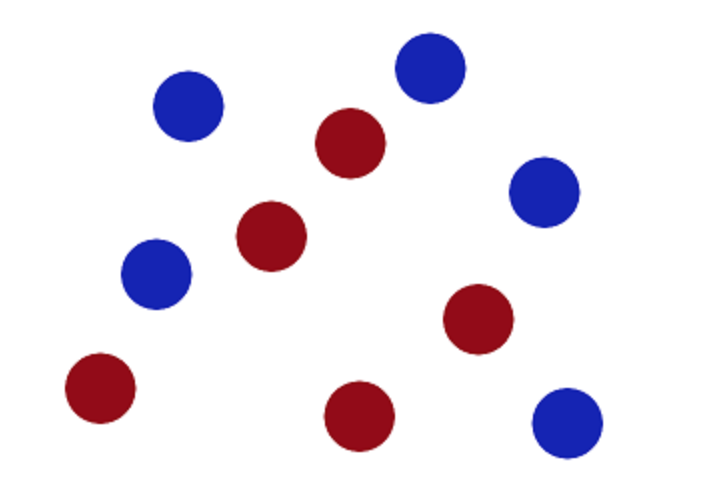

In [26]:
from IPython.display import Image
Image(filename='image1.png')

SVM algorithm will then try to draw the best possible line (SVM is a type of linear separator) that can separate blue and red dots into two groups by finding 'Maximum margin' (the line in the middle) for the given dataset of learning pattern as shown below: 

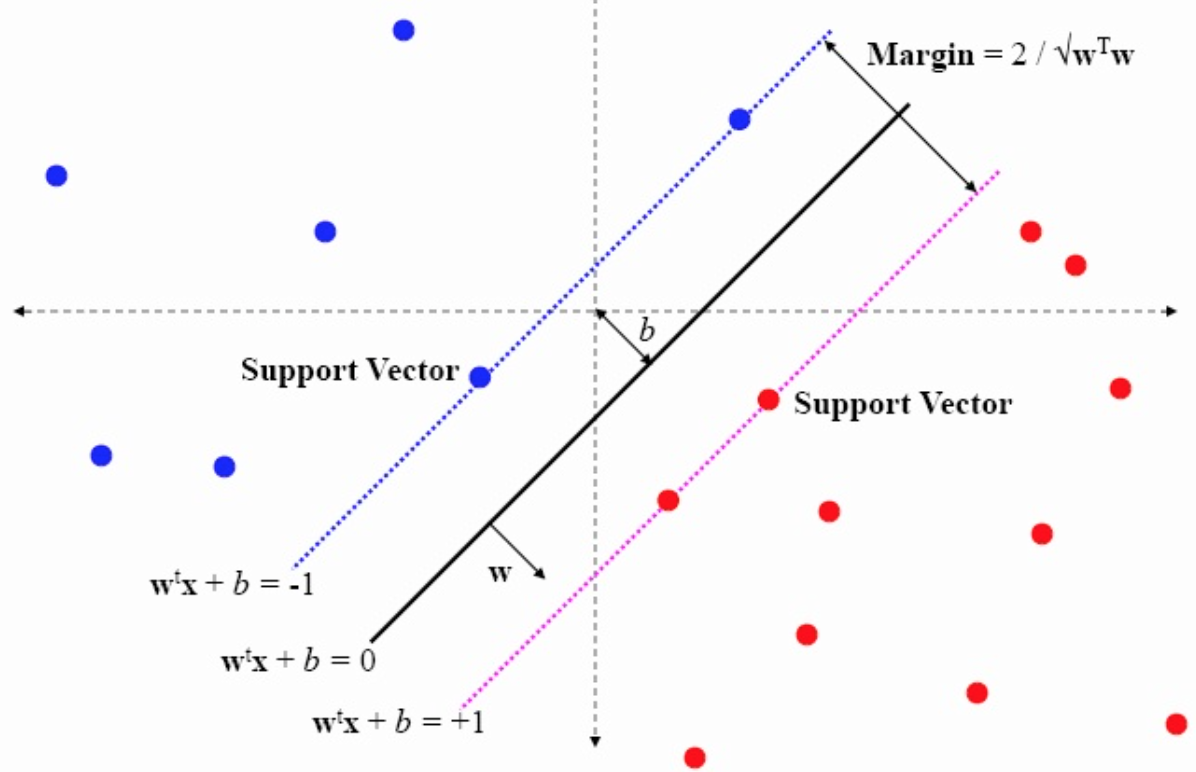

In [27]:
from IPython.display import Image
Image(filename='image3.png')

However, this line (optimal hyperplane) in the middle will appear as 'curvy' when SVM algorithm maps two different groups of dots and projects this straight line into a higher order space. This is called 'kernal tricks' and it allows us to draw a straight lines in a high dimentional spaces (feature space can be greater than 3 dimentional space).  SVM model learns the student's performance indicators in this way and predicts new outcomes whether new students would graduate or not when new information is fed into our model.

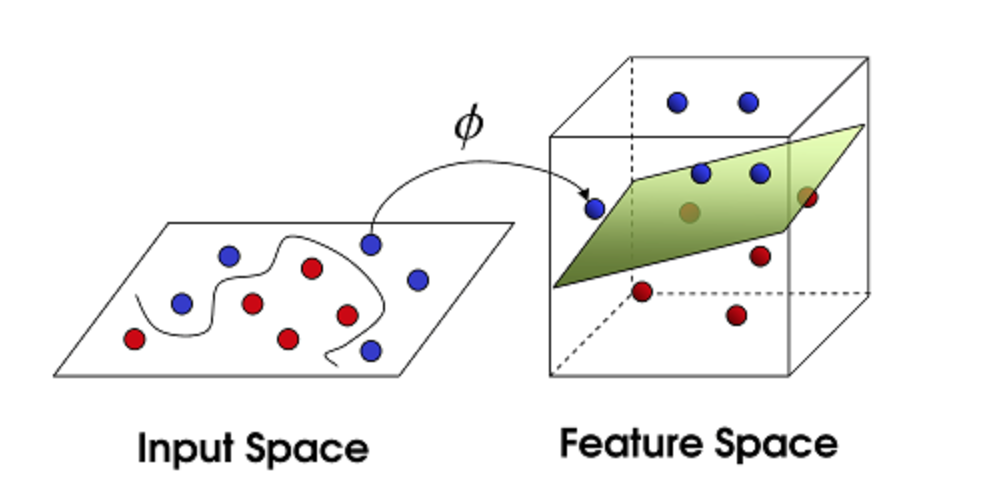

In [28]:
from IPython.display import Image
Image(filename='image2.png')

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [32]:
# TODO: Import 'GridSearchCV' and 'make_scorer'

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# TODO: Create the parameters list you wish to tune
parameters = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
 }]

# TODO: Initialize the classifier
clf = svm.SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0045 seconds.
Tuned model has a training F1 score of 0.8407.
Made predictions in 0.0014 seconds.
Tuned model has a testing F1 score of 0.8435.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: The final model's F1 score for training is 0.8407, and for testing is 0.8435. Compared to the untuned model, no training score has improved after tuning the model but the testing scores have improved a little bit for training size less than 200.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.